# Problem Set: Explore Two Variables

## Quiz 1: Price vs x

In [30]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(reshape2)
theme_set(theme_bw())

data(diamonds)

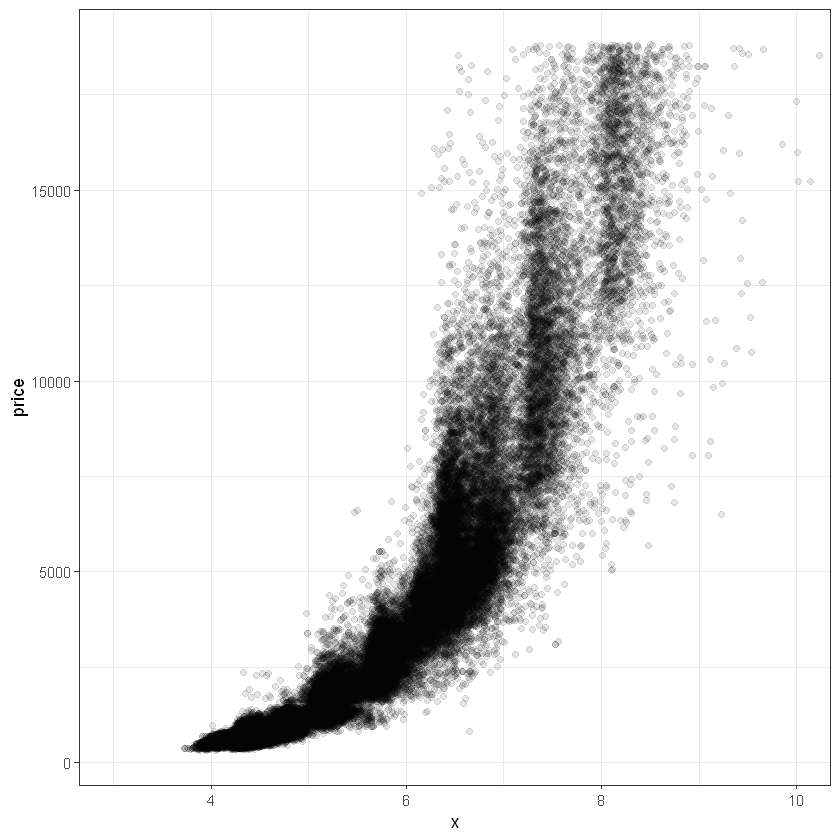

In [31]:
# scatterplot of price vs x.

ggplot(aes(x = x, y = price), data = diamonds) +
    coord_cartesian(xlim = c(3, 10)) +
    geom_point(alpha = 1/10, position = position_jitter(h = 0))

## Quiz 2: What are your observations about the scatterplot of price and x?

## Quiz 3: Correlation

In [32]:
## What is the correlation between price and x?
with(diamonds, cor.test(diamonds$price, diamonds$x, method = 'pearson'))


	Pearson's product-moment correlation

data:  diamonds$price and diamonds$x
t = 440.16, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8825835 0.8862594
sample estimates:
      cor 
0.8844352 


In [33]:
## What is the correlation between price and y?
with(diamonds, cor.test(diamonds$price, diamonds$y, method = 'pearson'))


	Pearson's product-moment correlation

data:  diamonds$price and diamonds$y
t = 401.14, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8632867 0.8675241
sample estimates:
      cor 
0.8654209 


In [34]:
## What is the correlation between price and z?
with(diamonds, cor.test(diamonds$price, diamonds$z, method = 'pearson'))


	Pearson's product-moment correlation

data:  diamonds$price and diamonds$z
t = 393.6, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8590541 0.8634131
sample estimates:
      cor 
0.8612494 


## Quiz 4: Price vs. Depth

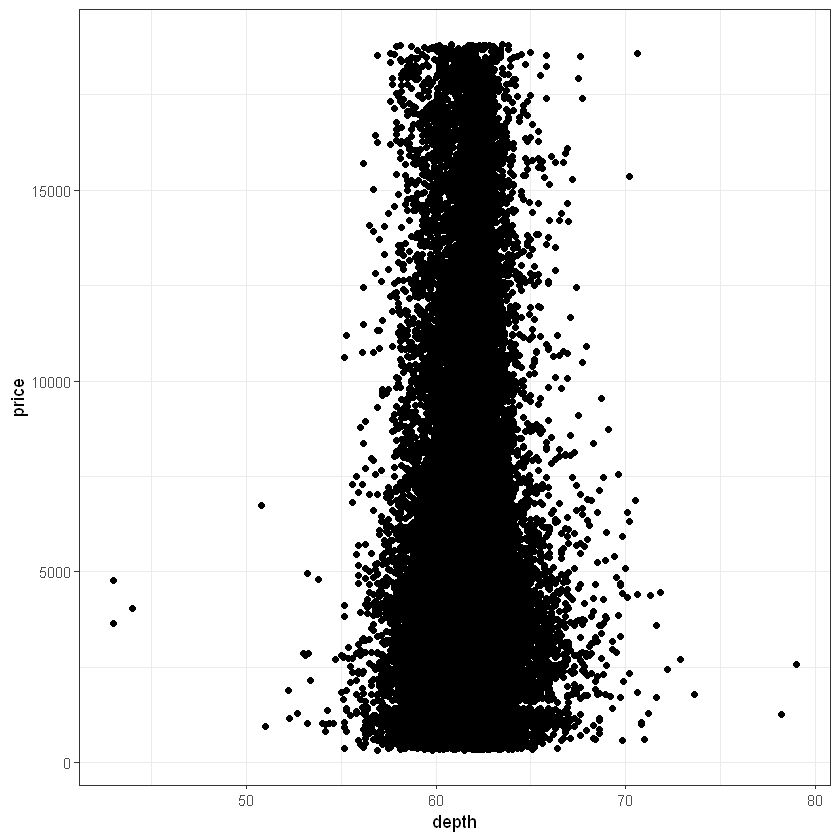

In [35]:
# scatter plot of price vs depth.

ggplot(diamonds, aes(depth, price)) +
  geom_point()

## Quiz 5: Adjustments - Price vs. Depth

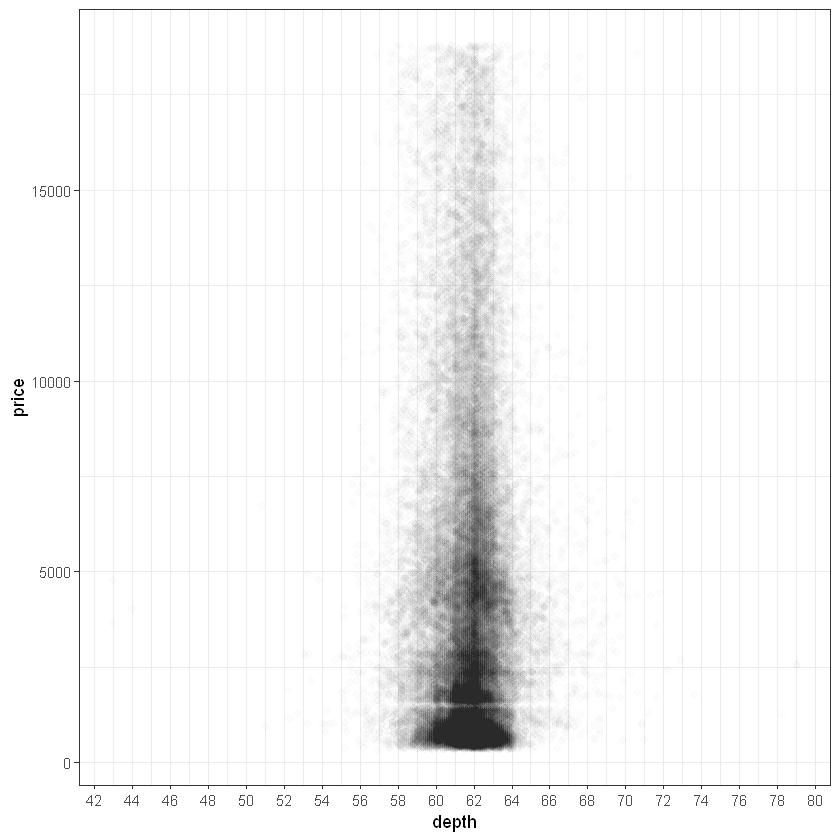

In [36]:
# Change the code to make the transparency of the points to be 1/100 of what they are now and mark the x-axis every 2 units. 

ggplot(diamonds, aes(depth, price)) +
  geom_point(alpha = 1/100) +
  scale_x_continuous(breaks = seq(0, 100, 2))

## Quiz 6: Typical Depth Range

In [37]:
## Based on the scatterplot of depth vs. price, mots diaonds are between what values of depth?
with(diamonds,
     c(quantile(depth, 0.05),
       quantile(depth, 0.25),
       quantile(depth, 0.75),
       quantile(depth, 0.95)
       )
)

5%  25%  75%  95% 
59.3 61.0 62.5 63.8

## Quiz 7: Correlation - Price and Depth

In [38]:
## What's the correlation of depth vs. price?
with(diamonds, cor.test(diamonds$depth, diamonds$price, method = 'pearson'))


	Pearson's product-moment correlation

data:  diamonds$depth and diamonds$price
t = -2.473, df = 53938, p-value = 0.0134
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.019084756 -0.002208537
sample estimates:
       cor 
-0.0106474 


In [39]:
## Based on the correlation coefficient would you use depth to predict the diamond? Why?
## No, because there is no significant relationship between the diamonds depth and diamonds price

## Quiz 8: Price vs. Carat

Warning message:
"Removed 926 rows containing missing values (geom_point)."

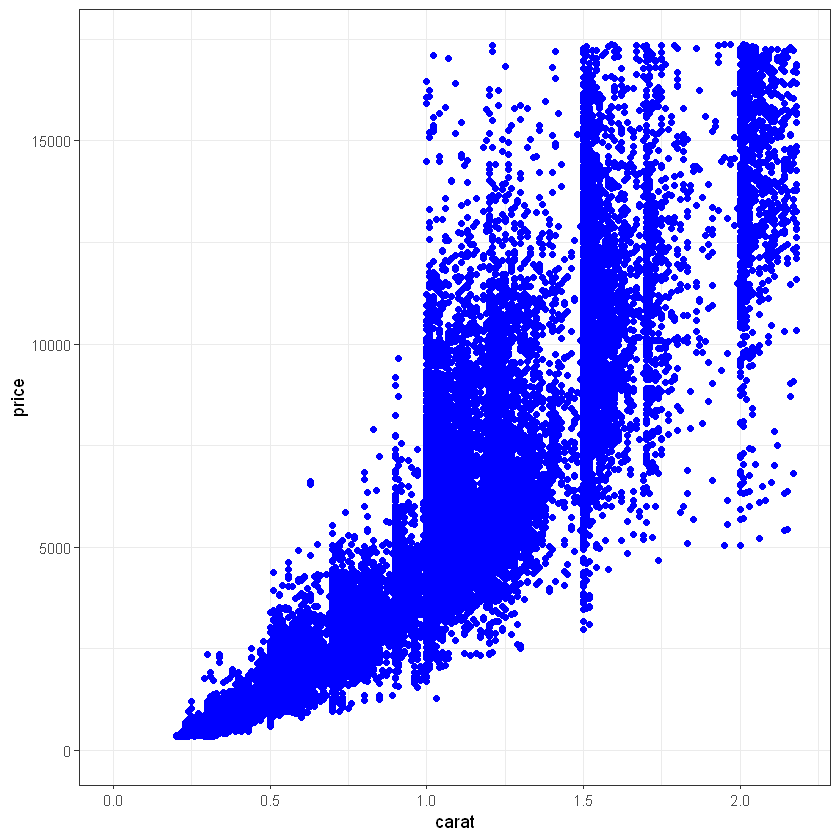

In [40]:
# Create a scatterplot of price vs carat and omit the top 1% of price and carat values.

ggplot(diamonds, aes(carat, price)) +
  geom_point(colour = "blue") +
  scale_x_continuous(limits = c(0, quantile(diamonds$carat, 0.99))) +
  scale_y_continuous(limits = c(0, quantile(diamonds$price, 0.99)))

## Quiz 9: Price vs. Volume

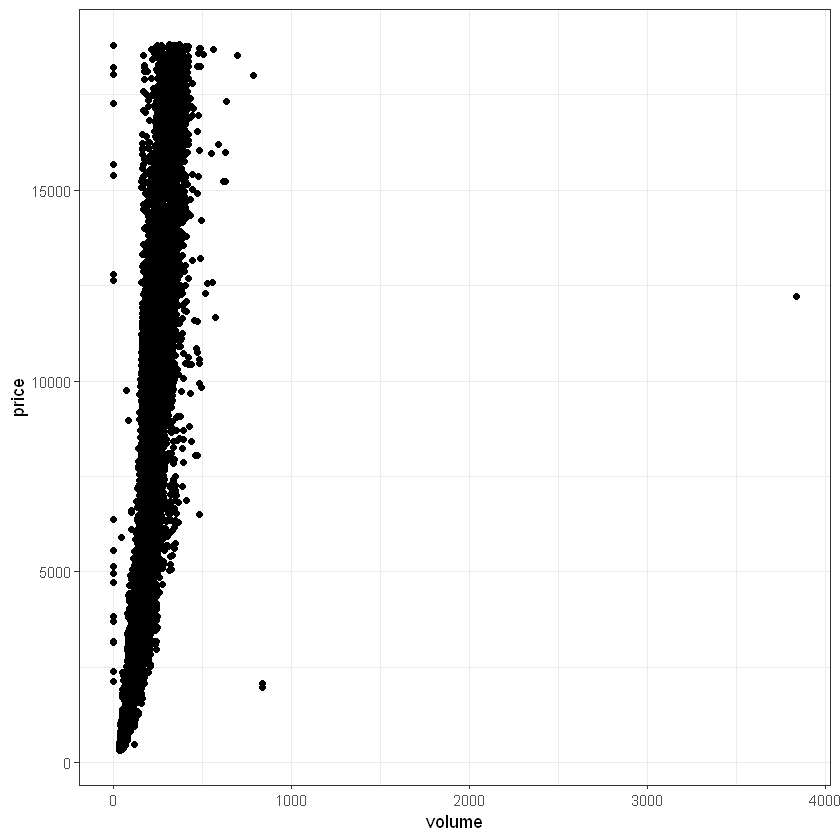

In [41]:
# Create a scatterplot of price vs. volume (x * y * z).
# Create a new variable for volume in the diamonds data frame.

# Add volume 
diamonds$volume <- with(diamonds, x * y * z)

# Create scatterplot of price vs. volume
ggplot(diamonds, aes(volume, price)) + geom_point()

## Quiz 10: Findings - price vs. volume

In [42]:
## What are your observations from the price vs. volume scatterplot?

## Quiz 11: Correlations on Subsets

In [43]:
## What's the correlation of price and volume? Exclude diamonds that have a volume of 0 or that are greater than equal to 800
with(diamonds[diamonds$volume > 0 & diamonds$volume < 800, ], cor(volume, price))

[1] 0.9235455

## Quiz 12: Adjustments - price vs. volume

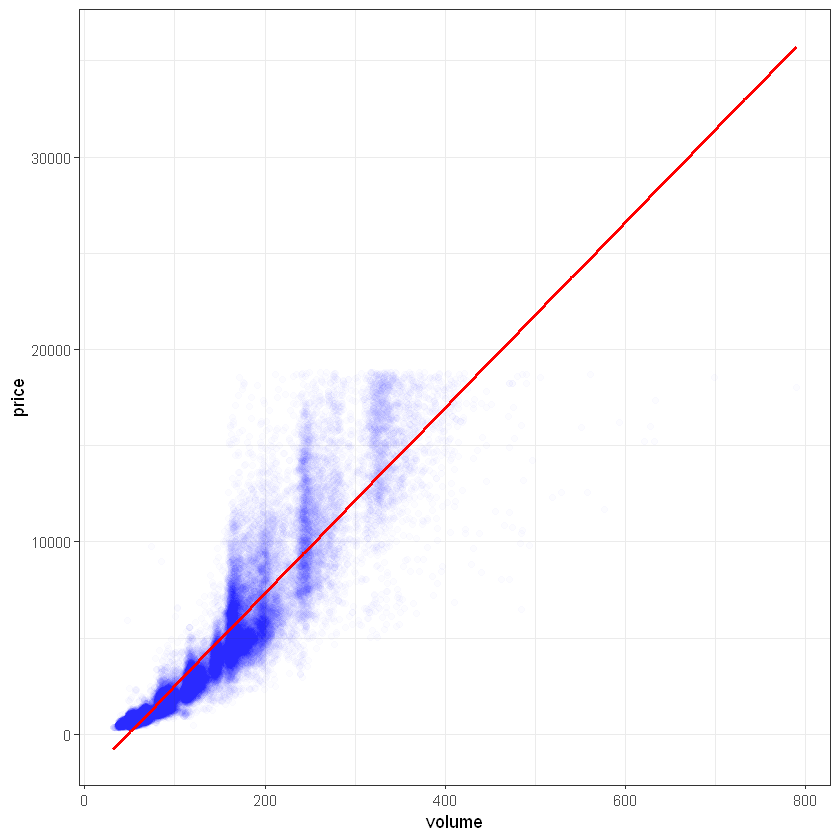

In [44]:
# Subset the data to exclude diamonds with a volume greater than or equal to 800. Also, exclude diamonds with a volume of 0.
# Adjust the transparency of the points and add a linear model to the plot.

ggplot(diamonds[diamonds$volume > 0 & diamonds$volume < 800, ], aes(x = volume, y = price)) +
  geom_point(alpha = 1/100, colour = "blue") + 
  geom_smooth(method = "lm", colour = "red")

In [45]:
## Do you think this would be a useful model to estimate the price of diamonds? Why or why not?

## Quiz 13: Mean Price by Clarity

In [46]:
## Use the function dplyr package to create a new data frame containing info on diamonds by clarity.
## Name the data frame diamondsByClarity

## The data frame should contain the following variables in this order.
#       (1) mean_price
#       (2) median_price
#       (3) min_price
#       (4) max_price
#       (5) n

# where n is the number of diamonds in each level of clarity.

In [47]:
diamondsByClarity <- summarise(group_by(diamonds, clarity),
                               mean_price = mean(price),
                               median_price = median(price),
                               min_price = min(price),
                               max_price = max(price),
                               n = n()
                              )
 
diamondsByClarity

clarity,mean_price,median_price,min_price,max_price,n
I1,3924.169,3344,345,18531,741
SI2,5063.029,4072,326,18804,9194
SI1,3996.001,2822,326,18818,13065
VS2,3924.989,2054,334,18823,12258
VS1,3839.455,2005,327,18795,8171
VVS2,3283.737,1311,336,18768,5066
VVS1,2523.115,1093,336,18777,3655
IF,2864.839,1080,369,18806,1790


## Quiz 14: Bar Charts of Mean Price

In [48]:
## We’ve created summary data frames with the mean price by clarity and color. 
## You can run the code in R to verify what data is in the variables diamonds_mp_by_clarity
## and diamonds_mp_by_color. Your task is to write additional code to create two bar plots on 
## one output image using the grid.arrange() function from the package gridExtra.

diamonds_by_clarity <- group_by(diamonds, clarity)
diamonds_mp_by_clarity <- summarise(diamonds_by_clarity, mean_price = mean(price))

diamonds_by_color <- group_by(diamonds, color)
diamonds_mp_by_color <- summarise(diamonds_by_color, mean_price = mean(price))

In [49]:
# Bar plot diamond mean price by clarity
p1 <- ggplot(diamonds_mp_by_clarity, aes(clarity, mean_price)) + geom_bar(stat = "identity") +
  labs(title = "Diamonds: Mean Price by Clarity", x = "Diamond Clarity", y = "Mean Price (USD)")

# Bar plot diamond mean price by color
p2 <- ggplot(diamonds_mp_by_color, aes(color, mean_price)) + geom_bar(stat = "identity") +
  labs(title = "Diamonds: Mean Price by Color", x = "Diamond Color", y = "Mean Price (USD)")

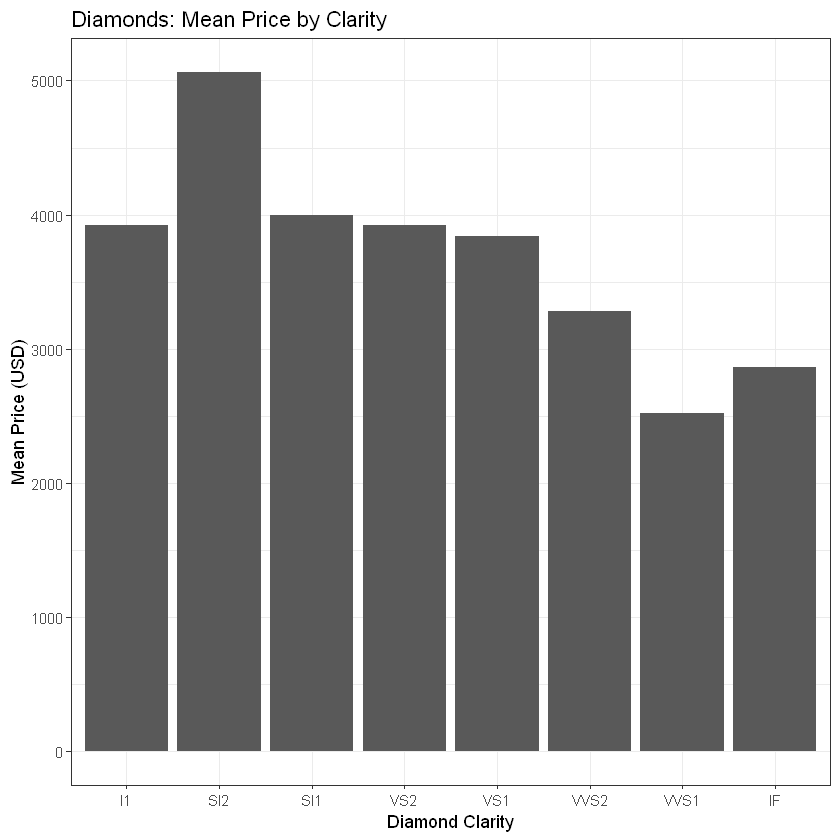

In [50]:
p1

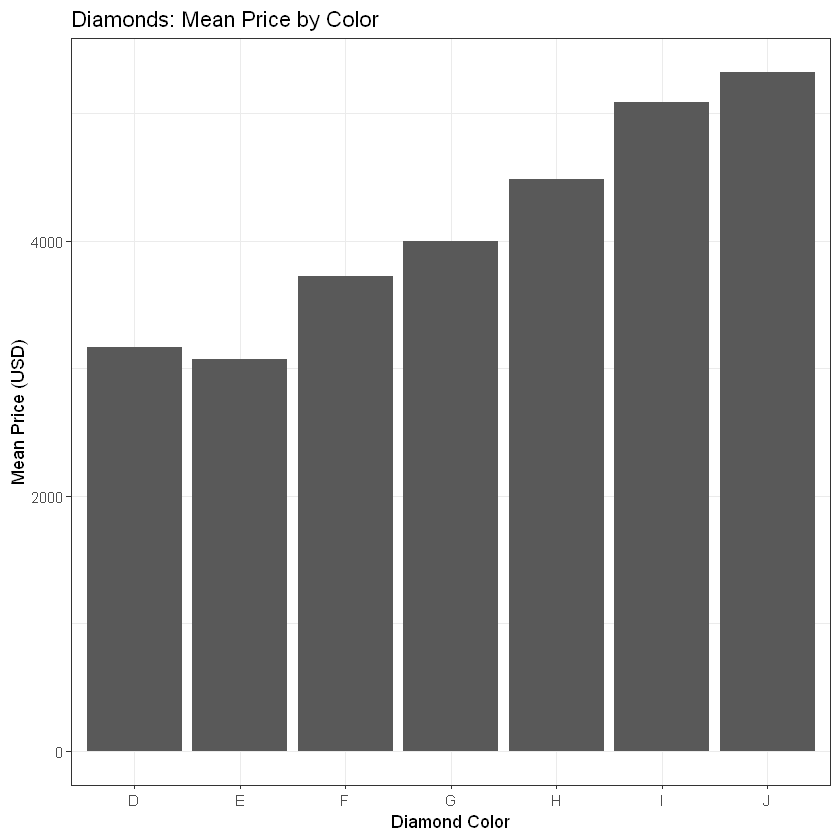

In [51]:
p2

## Quiz 15: Trends in Mean Price

In [52]:
## What do you notice in each of the bar charts for mean price by clarity and mean price by color?

## Quiz 16: Gapminder Revisited

In [53]:
d <- read.csv(file = "pab_immunized_percent_of_newborns.csv", header = TRUE, sep = ",")
head(d)

country,X1980,X1981,X1982,X1983,X1984,X1985,X1986,X1987,X1988,...,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011
Afghanistan,NA,3,2,4,5,13,18,13,16,...,52,62,95,96,95,84,83,89,79,60
Albania,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,80,81,85,86,87,87,87,87,87,87
Algeria,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,66,66,69,69,70,70,71,71,90,90
Angola,NA,NA,NA,8,13,19,25,27,31,...,68,71,73,75,77,78,79,88,75,70
Bahamas,NA,NA,NA,NA,NA,NA,NA,61,65,...,87,88,89,90,92,90,90,90,90,92
Bahrain,5,36,25,31,34,34,18,13,28,...,94,91,97,97,93,96,99,94,94,94


In [54]:
# Remove NA rows and columns
d[ncol(d)] <- NULL
d <- d[!is.na(d[[1]]),]

In [55]:
d2 <- melt(d, id.vars='country', measure.vars=c('X1980','X1990','X2000','X2010'), na.rm=TRUE, variable.name='year')
d2$year <- gsub('X','', d2$year)
mysample <- d2[sample(1:nrow(d2), 8, replace=FALSE),]
head(mysample)

,country,year,value
124,Chad,1990,14
46,Indonesia,1980,6
294,Suriname,2000,92
174,Nigeria,1990,32
186,Somalia,1990,49
297,Tanzania,2000,79


Saving 6.67 x 6.67 in image


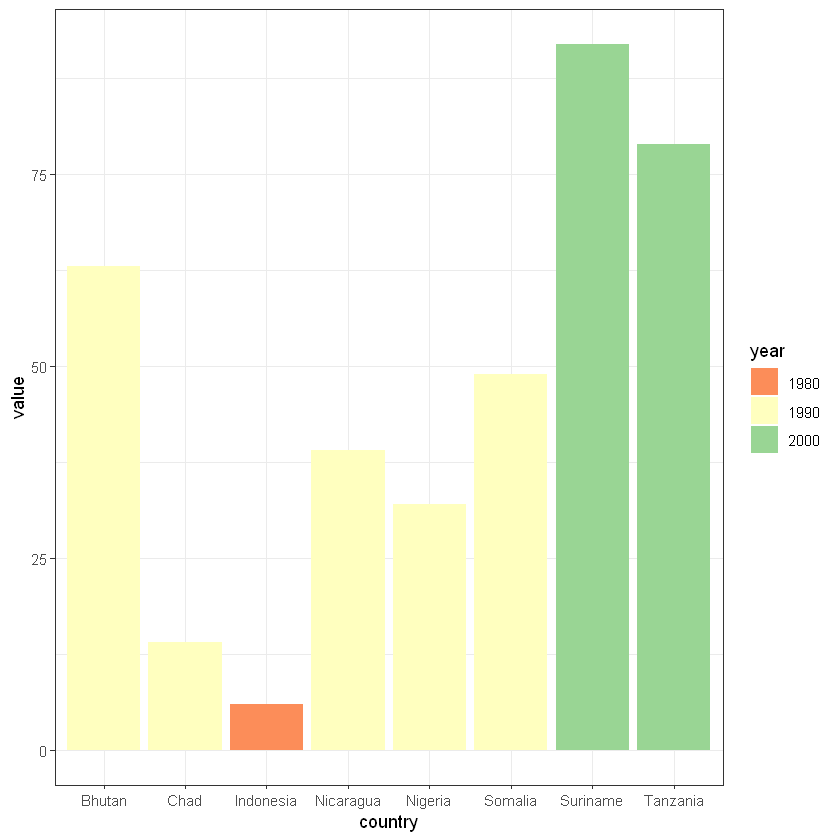

In [56]:
ggplot(mysample, aes(x=country, y=value, fill=year)) + geom_bar(stat="identity") + scale_fill_brewer(palette="Spectral")
ggsave('PBABarPlot.png')

Saving 6.67 x 6.67 in image


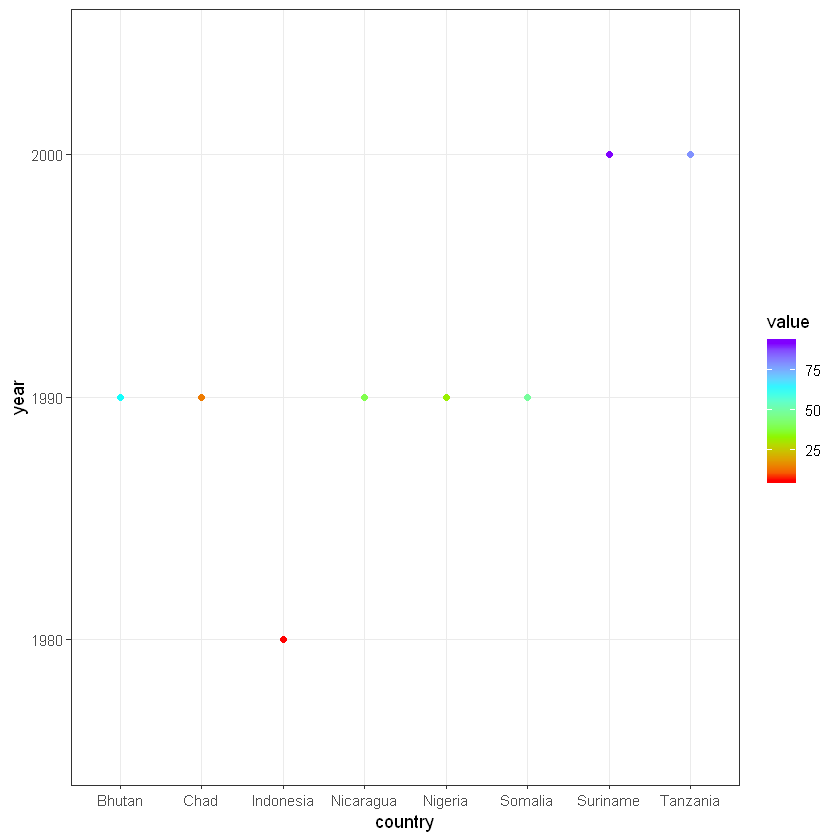

In [57]:
ggplot(mysample, aes(x=country, y=year, colour=value)) + geom_point() + scale_colour_gradientn(colours=rainbow(4))
ggsave('PBAPointPlot.png')